<a href="https://www.kaggle.com/code/henilj7/zomato-analysis?scriptVersionId=103002787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [3]:
!pip install openpyxl 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 970.5 kB/s eta 0:00:00


In [4]:
df = pd.read_csv("../input/zomato-restaurants-data/zomato.csv",encoding="latin-1") 
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Infomation about the dataset**

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.shape

(9551, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


finding missing values in our dataset



In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Cuisines have 9 null values

In [10]:
df_country = pd.read_excel('../input/zomato-restaurants-data/Country-Code.xlsx')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


**Merge two tables**

In [11]:
df1 = pd.merge(df,df_country,on='Country Code',how='left')
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
df1.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

**Exploratory Analysis and Visualization**

List of countrys that present in dataset


In [13]:
print('List of counteris the survey is spread accross')
for x in pd.unique(df1.Country): print(x)
print()
print('Total number to country', len(pd.unique(df1.Country)))

List of counteris the survey is spread accross
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


In [14]:
print('Top 3 Country with number of Orders')
df1.Country.value_counts().head(3) 

Top 3 Country with number of Orders


India             8652
United States      434
United Kingdom      80
Name: Country, dtype: int64

From this we can say that the maximum number of transactions happen in India

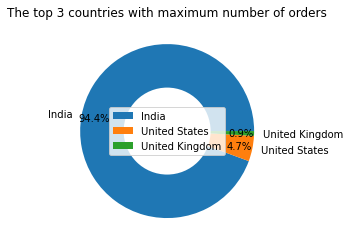

In [15]:
country_names = df1.Country.value_counts().index                 
country_val = df1.Country.value_counts().values  

plt.pie(country_val[:3], labels=country_names[:3],
        autopct='%1.1f%%', pctdistance=0.85,
        )
  
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)
  
plt.title('The top 3 countries with maximum number of orders')

plt.legend(country_names[:3], loc="center")

plt.show()

In [16]:
import plotly.graph_objects as go
country_names = df1.Country.value_counts().index                 
country_val = df1.Country.value_counts().values  

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=country_names[:3], values=country_val[:3], pull=[0.5, 0, 0], 
                             title='Population of European continent')])
fig.show()

#Pulling sectors out from the center
# https://plotly.com/python/pie-charts/

**Exploring raiting**

In [17]:
df2 = df1.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df2.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


The above information helps us to understand the relation between Aggregate rating, color, and text. 
The following color assigned to the ratings:

* Rating 0 — White — Not rated
* Rating 1.8 to 2.4 — Red — Poor
* Rating 2.5 to 3.4 — Orange — Average
* Rating 3.5 to 3.9 — Yellow — Good
* Rating 4.0 to 4.4 — Green — Very Good
* Rating 4.5 to 4.9 — Dark Green — Excellent

**Data Visulizing**

User Raiting

Text(0.5, 1.0, 'User Ratings')

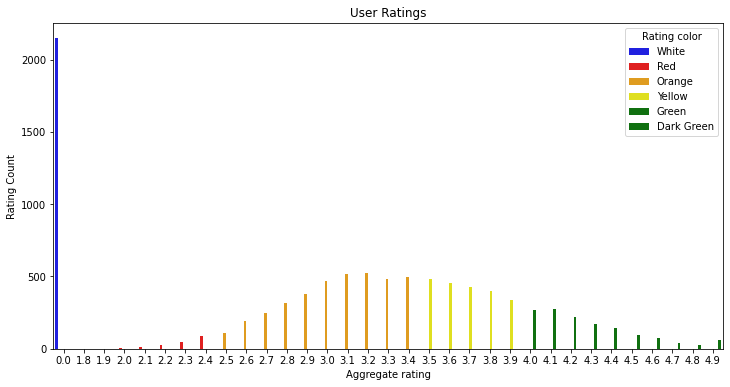

In [18]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',hue = 'Rating color',data=df2,
            palette=['blue','red','orange','yellow','green','green'])
plt.title('User Ratings')

**Maximum restaurants seems to have gone No ratings. Let us check if these restaurants belong to some specific country.**

In [19]:
No_rating = df1[df1['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have maximum unrated restaurants. 

**Currency Usage By Each Country**

In [20]:
country_currency = df1[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


**Distribution of Online Delivery**

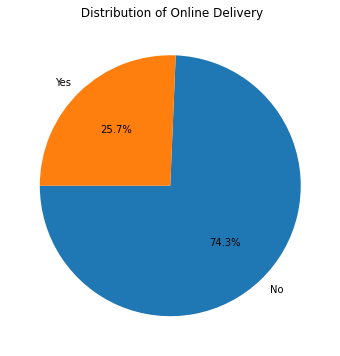

In [21]:
plt.figure(figsize=(12,6))
plt.title(' Distribution of Online Delivery')
plt.pie(df1['Has Online delivery'].value_counts(), 
        labels=df1['Has Online delivery'].value_counts().index,
        autopct='%1.1f%%', startangle=180);

Only 25% of restaurants accept online delivery. This data might be biased as we have the maximum number of restaurants listed here are from India. 

In [22]:
import plotly.graph_objects as go

labels = list(df1.City.value_counts().head(20).index)
values = list(df1.City.value_counts().head(20).values)

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.6,title="Zomato's Presence Citywise")])
fig.show()


#Donut chart
#https://plotly.com/python/pie-charts/

The data seems to be skewed towards New Delhi, Gurgaon, and Noida. I see minimal data for other cities. 

**Q & A**

*From which Locality maximum hotels are listed in Delhi Zomato*

In [23]:
import plotly.graph_objects as go
Delhi = df1[(df1.City == 'New Delhi')]
fig = go.Figure(data=[go.Bar(
    x=Delhi.Locality.value_counts().head(10).index,
    y=Delhi.Locality.value_counts().head(10),
    
)])

fig.show()

Connaught place seems to have a high no of restaurants registered with Zomato.

*What kind of Cuisine do these highly-rated restaurants offer*

top 10 cuisine availabel

In [24]:
cuisine_val = df1.Cuisines.value_counts()             
cuisine_label = df1.Cuisines.value_counts().index 
fig = go.Figure(data=[go.Pie(labels=cuisine_label[:10], values=cuisine_val[:10], textinfo='label+percent',
                             insidetextorientation='radial',title='Top 10 Cuisine'
                            )])
fig.show()

*How many of such restaurants accept online delivery*

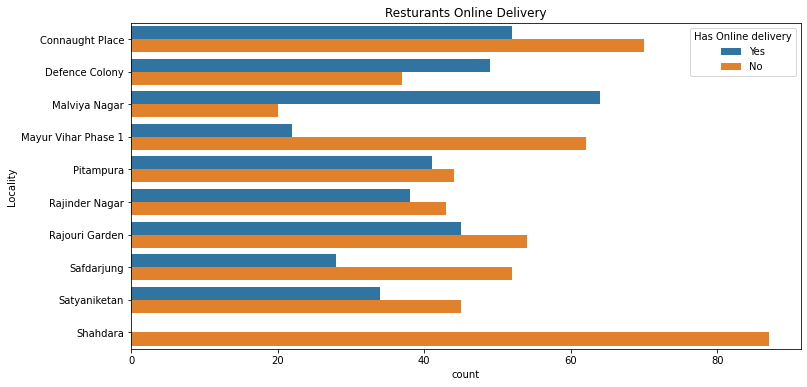

In [25]:
top_locality = Delhi.Locality.value_counts().head(10)
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

Online Delivery seems to be on the higher side in Defence colony and Malviya Nagar.
Other than Shahdara locality ,in other restaurants localities accept online delivery.

*Rating VS Cost of dinning*

In [26]:
import plotly.express as px

fig = px.scatter(Delhi, x="Average Cost for two", y="Aggregate rating", color='Price range',)
fig.show()

I observe there is no linear relation between price and rating.


*Location of Highly rated restaurants across New Delhi*

In [27]:
Delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

In [28]:
High_rating = Delhi[Delhi['Rating text'].isin(['Excellent'])]
fig = px.scatter_mapbox(High_rating, lat="Latitude", lon="Longitude", hover_name="City",
                        hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Highle rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()